In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msn
import os
import joblib
import tarfile
import urllib


### Sklearn
from sklearn import datasets

# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, confusion_matrix

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE


# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

## Load the MNIST DataSet

In [2]:
### Load the MNIST Data
mnist = datasets.fetch_openml('mnist_784', version=1)

In [3]:
### split the data
X = mnist['data']
y = mnist['target']

### subset the data to be avle to perform svd on it
X_subset = X.iloc[:15000]
X_subset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

`Apply PCA manually`
` using svd (singular value decomposition)`
$$X^{+} = U * S * V^{T}$$

In [4]:
## you should center the data first
## if you use PCA it will handle it by itself
X_centered = X_subset - X_subset.mean()

# SVD will return three U, s, Vt 
## we need Vt
U, s, Vt = np.linalg.svd(X_centered)

## get pcs , let choose the first three pcs
pcs = Vt.T[:,:3]

## to get the new Matrix
X_projected = X_subset @ pcs
X_projected   ## ok mission complete

,0,1,2
0,-901.701765,428.321450,326.260064
1,-1826.574570,519.053095,803.400175
2,-734.844247,-326.357478,78.547315
3,69.290026,699.728186,602.257841
4,-458.062709,-627.239476,479.658261
...,...,...,...
14995,217.913695,580.201732,464.396534
14996,-157.890063,353.786042,-227.201257
14997,-467.307222,-564.833603,376.879501
14998,17.975589,328.767762,243.810173


` using pca sklearn`

In [5]:
## the same above example

X = mnist['data']

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca = pd.DataFrame(X_pca)

print('pca.explained_variance_ratio_ =>', pca.explained_variance_ratio_)

pca.explained_variance_ratio_ => [0.09746116 0.07155445 0.06149531]


In [6]:
## tou can choose to get for exaple 0.95 of the variance 

pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

X_pca_95 = pd.DataFrame(X_pca_95)
print('X_pca_95.shape =>', X_pca_95.shape)  
### here i take for 95% variance about 154 column instead of 784 column (nice)

X_pca_95.shape => (70000, 154)


idx_95 will be the same above result = 154 dimension =>  154


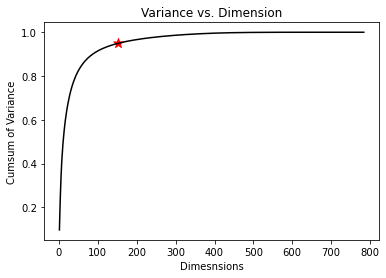

In [7]:
### to get the dimension plotting with variance

pca_other = PCA()
pca_other.fit(X)
cumsum = np.cumsum(pca_other.explained_variance_ratio_)
idx_95 = np.argmax(cumsum>=0.95) + 1
print('idx_95 will be the same above result = 154 dimension => ', idx_95)

### plotting
plt.plot(np.arange(1,785), cumsum, 'k-')
plt.xlabel('Dimesnsions')
plt.ylabel('Cumsum of Variance')
plt.title('Variance vs. Dimension')
plt.scatter(x=151, y=0.95, color='r', marker='*', s=100)
plt.show()

### `Reconstruction`

In [8]:
### you can get back to the original matrix , but with some reconstruction errors

## svd_solver hyperparameter >>> takes (auto, full, randomized)
pca = PCA(n_components=154, svd_solver='auto')
X_reduced = pca.fit_transform(X)
X_reduced = pd.DataFrame(X_reduced)

### recover
X_recovered = pca.inverse_transform(X_reduced)
X_recovered = pd.DataFrame(X_recovered)
X_recovered.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.589379e-13,2.703049e-13,-4.238305e-13,-2.814488e-13,-3.095520e-13,-1.346428e-13,-3.536780e-16,3.578746e-14,-1.246476e-13,-1.879867e-13,...,-0.847813,-0.435443,-0.175642,-0.037260,-0.097826,-0.024130,0.0,0.0,0.0,0.0
1,7.018776e-14,5.128242e-14,-1.372461e-13,-1.548124e-13,4.241173e-14,-1.158388e-14,-1.202866e-13,-3.311669e-13,1.630431e-13,-5.308788e-14,...,0.838512,0.537276,0.290158,0.080488,0.173375,0.037632,0.0,0.0,0.0,0.0
2,-2.238199e-13,-3.391580e-13,7.442571e-14,-1.034750e-13,2.532730e-13,-4.769066e-13,5.746119e-13,-8.511635e-14,2.691953e-14,-8.252582e-14,...,9.051272,4.702464,1.843754,0.426374,-0.089419,-0.060231,0.0,0.0,0.0,0.0
3,1.782697e-13,-1.724423e-13,2.027839e-13,1.486561e-13,1.667355e-13,1.748407e-13,9.422662e-14,1.948581e-13,-1.341638e-13,1.475053e-13,...,-0.153472,-0.335061,-0.098490,-0.003700,-0.028635,-0.009335,0.0,0.0,0.0,0.0
4,-4.890031e-14,-1.551922e-14,8.371156e-14,-7.188064e-14,8.100607e-14,4.361998e-13,-1.284334e-13,1.927163e-14,-4.343635e-14,1.279700e-13,...,2.905306,0.473114,-0.079682,-0.011297,-0.041153,-0.006951,0.0,0.0,0.0,0.0


### `Incremental PCA`

In [9]:
### Incremental pca helps in problems of (out of core)
## let's try with some number of batches

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

### loop and only partial fit
for batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(batch)
    
X_reduced = inc_pca.transform(X)
X_reduced = pd.DataFrame(X_reduced)
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,122.255007,316.233645,51.131782,556.897593,-49.209378,-217.068754,233.712684,188.824287,-358.799779,203.544286,...,73.805908,-16.414691,32.917062,-23.401677,-11.305323,-45.639076,-10.121299,79.549787,70.817891,9.171330
1,1010.494459,289.964470,-576.120818,485.084205,-841.478633,-145.467420,-48.332524,-102.230718,34.785537,151.268239,...,5.740897,87.701681,1.006155,-4.644288,48.814448,46.999776,28.936237,24.447860,-50.076869,39.407491
2,-58.995999,-393.698047,161.997245,-529.220864,-313.159458,8.969471,-860.992353,374.290772,-78.502189,-192.723700,...,47.918900,5.516353,-101.754567,-44.185629,-40.866251,58.531564,65.020376,56.436546,-87.922680,-17.832396
3,-796.965195,607.421156,-295.522597,-109.112483,25.665906,697.860914,-474.507036,-99.776449,298.604314,4.532157,...,58.669210,-0.711161,18.674953,-48.264480,-11.143099,20.127117,4.424049,36.464501,-11.329792,-9.154312
4,-391.318636,-729.803919,-13.906725,242.894328,98.772859,35.925972,-87.458847,-415.777784,200.296995,106.210314,...,-25.125066,42.433843,-67.085358,19.440697,-26.296431,-11.454922,50.796205,-7.347689,63.831273,-47.843911


### `Kernel PCA`

In [10]:
### Swiss roll data
X, t = datasets.make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [11]:
### try using kernel pca
kern_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, fit_inverse_transform=True)
X_kern_reduced = kern_pca.fit_transform(X)

### after making   fit_inverse_transform=True >> you can get the reconstruction pre_image error
### look at this concept in the book page 228
X_preImage = kern_pca.inverse_transform(X_kern_reduced)

print('mean_squared_error(X, X_preImage) =>', mean_squared_error(X, X_preImage))

mean_squared_error(X, X_preImage) => 1.0638265974052997e-26


## LLE 
`Locally Linear Embedding`

In [12]:
### Swiss roll data
X, t = datasets.make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [13]:
### try Locally linear embedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)
X_reduced

array([[-0.01083179,  0.04071094],
       [ 0.05152922, -0.04028142],
       [ 0.02359918, -0.01473545],
       ...,
       [-0.03496151,  0.01792922],
       [ 0.05314468, -0.02821789],
       [-0.00434573,  0.04424298]])

## T-SNE
`t-Stochastic neighbour Embedding`

In [14]:
### Swiss roll data
X, t = datasets.make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

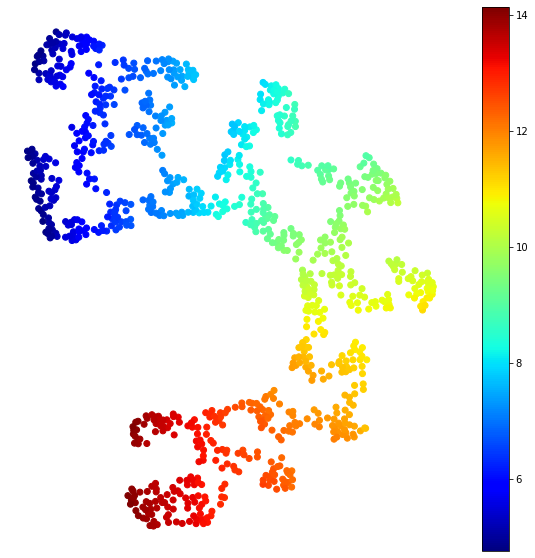

In [15]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

## Visualtization
plt.figure(figsize=(10,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()